<a href="https://colab.research.google.com/github/Sangh0/DeepLearning-Tutorial/blob/main/current_materials/DNN_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN (Deep Neural Network)을 구현하고 MNIST hand-written dataset으로 학습하기
- DNN은 MLP(Multi Lyaer Perceptron)이라고도 해요
- 두 용어 차이는 크게 없다고 보시면 되고요
- DNN or MLP의 구조는 다음 그림과 같이 이루어져 있어요
- 보통 딥러닝 모델을 구현할 때는 TensorFlow, PyTorch 두 개의 프레임워크를 활용하는데
- 텐서플로는 맛탱이가 간 친구니까 여기서는 파이토치를 쓸게요

<img src = "https://miro.medium.com/v2/resize:fit:1199/1*N8UXaiUKWurFLdmEhEHiWg.jpeg" width=800>


## Step 1. 패키지 및 모듈 임포트

In [ ]:
import numpy as np # 텐서 계산을 위해
import matplotlib.pyplot as plt # 시각화를 위해

import torch # 파이토치 텐서 사용을 위해
import torch.nn as nn # 뉴럴 네트워크 빌드를 위해
import torch.optim as optim # optimizer 사용을 위해
import torchvision.datasets as dsets # torchvision에 내장된 MNIST 데이터셋 다운로드 위해
import torchvision.transforms as transforms # torchvision 전처리를 위해
from torch.utils.data import DataLoader # 딥러닝 학습 데이터로더 구현을 위해

## Step 2. 하이퍼파라미터 미리 설정하기
- Hyperparameter란 파라미터를 결정짓는 파라미터예요
- 또 다른 말로는 사람이 직접 컨트롤할 수 있는 파라미터라고도 해요
- 즉, 딥러닝 모델 안에 존재하는 weight와 bias들이 파라미터에 해당하고요
- 이 파라미터들이 우리가 학습하고자 하는 데이터셋과 출력하고자 하는 의도에 맞게 학습하면서 업데이트를 해요
- 이 파라미터도 하이퍼파라미터에 의해 바뀔 수가 있어요
- 하이퍼파라미터는 예를 들자면 learning rate, batch size, epochs 등이 있어요

- 이 중에서 먼저 batch size에 대해 설명을 해 드릴게요
- 딥러닝에서는 보통 batch 단위로 데이터를 묶어서 학습을 해요
- 여기에는 크게 2가지 이유가 있어요
    - 1. 효율적인 학습을 위해 (전체 데이터를 한 번 보고 업데이트를 하는 것 보단 데이터를 나눠서 보고 각각 업데이트를 진행하는 것이 효율적이예요)
    - 2. 메모리 사용량을 줄이기 위해 (텍스트는 용량이 얼마 안되지만 이미지의 경우에는 해상도 높은 이미지가 수 십장, 수 백장 단위가 넘어가면 용량이 GB 단위가 돼요 그래서 메모리를 아끼기 위해 배치 별로 묶어서 학습해요)

    <img src = "https://blog.kakaocdn.net/dn/buu0of/btrCIT35S81/H4kIroveS6PLCJY2OKjXfk/img.png" width=500>


- 우리는 배치 묶음 하나를 보고 업데이트를 할 때 이를 1 iteration 또는

In [ ]:
# Set hyperparameters
Config = {
    'batch_size': 32,
    'learning_rate': 1e-3,
    'epochs': 10,
}

## Step 3. MNIST hand-written dataset 로드하기
- MNIST 데이터셋은 매우 작고 가볍다보니 파이토치에서 기본적으로 제공해줘요
- 텐서플로도 마찬가지로 기본적으로 제공해줘요

In [ ]:
# Load MNIST dataset
train_set = dsets.MNIST(
    root='mnist/',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_set = dsets.MNIST(
    root='mnist/',
    train=False,
    transform=transforms.ToTensor(),
    download=True,
)

train_loader = DataLoader(
    dataset=train_set,
    batch_size=Config['batch_size'],
    shuffle=True,
    drop_last=True,
)

test_loader = DataLoader(
    dataset=test_set,
    batch_size=Config['batch_size'],
    shuffle=True,
    drop_last=True,
)


100%|██████████| 9912422/9912422 [00:00<00:00, 143243011.94it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 72276666.96it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41666765.45it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15488234.77it/s]


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



The informations of training dataset: 
 Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist/
    Split: Train
    StandardTransform
Transform: ToTensor()

The informations of test dataset: 
 Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist/
    Split: Test
    StandardTransform
Transform: ToTensor()

The shape or size of image is torch.Size([1, 28, 28])
The label is 5


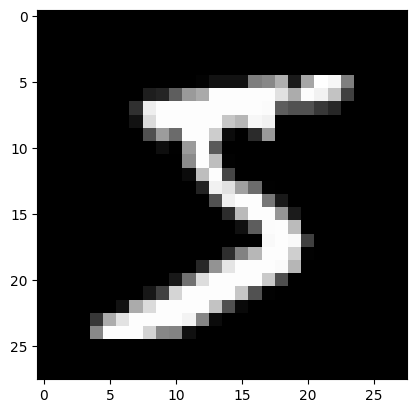

In [ ]:
print("The informations of training dataset: \n", train_set)
print("\nThe informations of test dataset: \n", test_set)
print(f"\nThe shape or size of image is {train_set[0][0].shape}")

image_sample = train_set[0][0]
label_sample = train_set[0][1]

plt.imshow(image_sample.permute(1, 2, 0), cmap='gray')
print(f'The label is {label_sample}')

- MNIST 데이터셋은 총 70,000장으로 이루어져 있고 그 사이즈는 $28\times 28$를 가져요
- training set은 60,000장, test set은 10,000장이예요
- 그리고 1이 의미하는 것은 gray scale이고요
- 만약 color라면 RGB로 3개의 채널을 가지게 돼요

### Preprocessing
- 전처리는 딥러닝 모델 학습을 위해선 꼭 필수예요
- 보통 이미지 데이터 전처리로는 모델에 입력으로 들어갈 사이즈를 통일시키는 것이 대부분이에요
- 또 필수로 해야 하는 전처리는 0~1 스케일링이예요
- 이미지의 각 픽셀 값들은 0~255 사이의 값을 가져요
- 이를 0~1 사이의 값으로 만들기 위해 255로 나눌 거예요
- 이를 도와주는 것이 transforms.ToTensor()예요
- MNIST 데이터셋은 모두 사이즈가 $28 \times 28$이어서 resize가 필요없지만 일반적으로 프로젝트를 수행할 때는 사이즈가 모두 다르므로 똑같은 사이즈로 resize를 하는 전처리도 필수적이예요


### 왜 0~1로 스케일링을 해야 하는가?
- 극단적으로 예를 들자면
    - 컴퓨터는 인간과 달리 큰 값을 가지는 변수에 대해서는 편향적으로 판단
    - 학습 과정에서 데이터들의 분포가 다르다면 어려움이 발생
- 그래서 스케일링은 전처리 과정에서 필수라고 할 수 있습니다

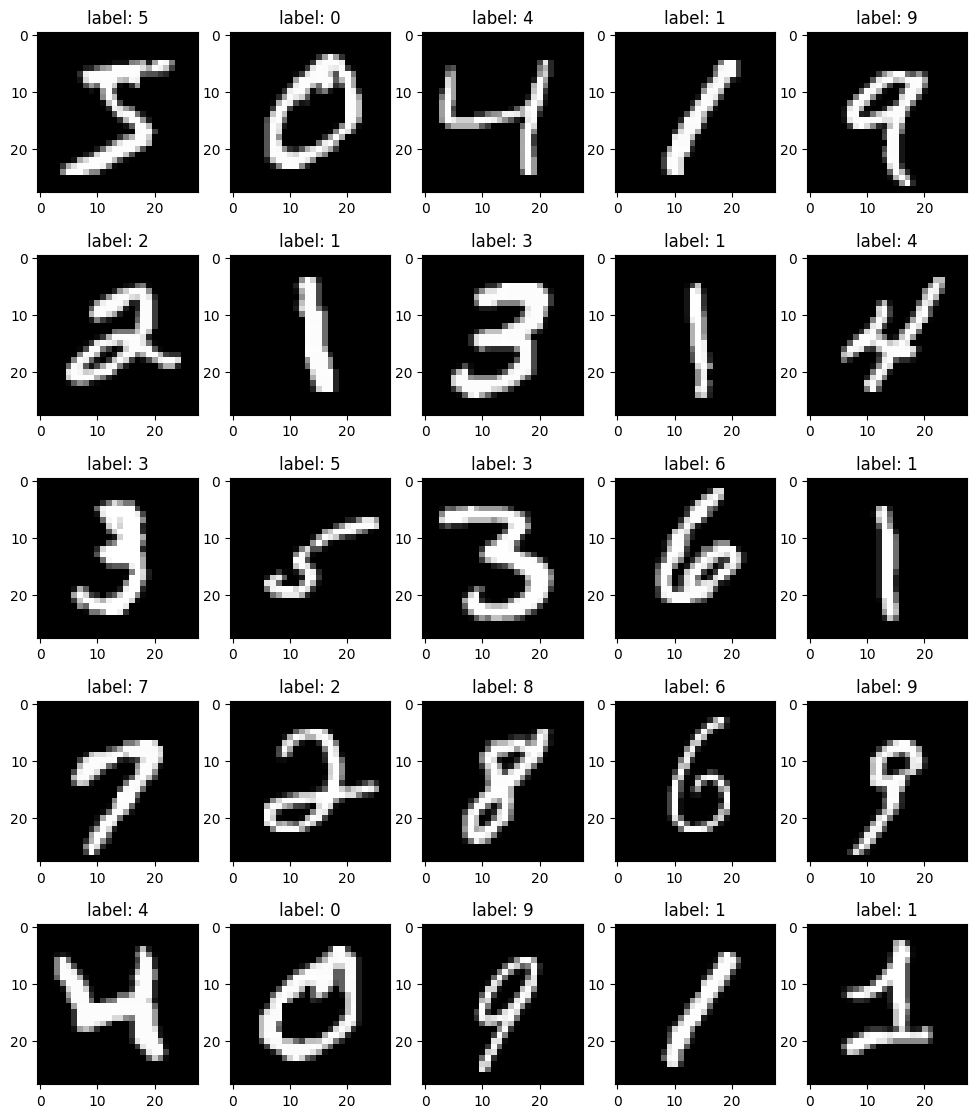

In [ ]:
plt.figure(figsize=(12, 14))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_set[i][0].permute(1, 2, 0), cmap='gray')
    plt.title(f'label: {train_set[i][1]}')
plt.show()

## step 4. MLP 빌드하기
- 이제 딥러닝의 중심이자 꽃이라고 할 수 있는 모델 빌드입니다

<img src = "https://miro.medium.com/v2/resize:fit:1199/1*N8UXaiUKWurFLdmEhEHiWg.jpeg" width=800>

- 위 그림에서 첫 번째 layer를 input layer라고 정의
- 마지막 layer를 output layer라고 정의
- 나머지는 hidden layer라고 정의

- input layer의 노드 갯수는 이미지의 총 픽셀 갯수를 의미
    - 즉, $28 \times 28 \times 1 = 784$
- output layer의 노드 갯수는 클래스의 갯수를 의미
    - 즉, 클래스가 0~9이므로 10개


- 다시 말해, hidden layer의 노드 갯수는 상관없지만 input과 output layer의 노드 갯수는 정해져 있음
- $\alpha$

In [ ]:
from torchsummary import summary

# 모델 빌드 방법 1
model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
)

# 모델 빌드 방법 2
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 100),
            nn.ReLU(),
            nn.Linear(100, output_dim),
        )

    def forward(self, x):
        return self.model(x)

model = MLP(input_dim=784, output_dim=10)

summary(model, (784, ))

"""
그냥 빌드하는 것보단 객체화를 위해서 클래스로 정의를 하는 것이 좋아요
그리고 클래스로 구현하는 것이 더 간지나잖아요?
"""

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,500
              ReLU-2                  [-1, 100]               0
            Linear-3                   [-1, 10]           1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.30
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


'\n그냥 빌드하는 것보단 객체화를 위해서 클래스로 정의를 하는 것이 좋아요\n그리고 클래스로 구현하는 것이 더 간지나잖아요?\n'

### 모델의 파라미터 갯수
- 회사에서 GPT-3는 파라미터 갯수가 175B다
- Llama-2는 7B, 13B, 70B 등 다양한 모델이 있다
- 이런 말 많이 들어보지 않으셨나요
- 이게 바로 파라미터 갯수인데요
- 방금 정의한 모델의 파라미터 갯수는 79,510개예요
- 지피티와 라마에 비하면 엄청나게 작고 가벼운 모델이라고 할 수 있어요
- 보통 파라미터 갯수가 많을수록 모델의 성능이 좋아져요
    - 단, 데이터 갯수도 많아야 합니다
    - 데이터 갯수가 적으면 파라미터 갯수가 많아도 좋은 성능을 기대하기 힘들어요

- 하지만 파라미터 갯수가 많아지면 연산 횟수도 많아져 처리 속도가 느려져요
- 즉, 파라미터 갯수랑 추론 시간은 대부분 비례 관계에 있다고 볼 수 있고요
- 이 둘은 trade-off 관계에 있어요

## Step 5. 활성화 함수는 왜 사용을 할까?

### Activation function이란?
- activation function은 이전 레이어의 출력값을 다음 레이어의 인풋으로 신호를 전달하는 역할이예요
- 왜 활성화 함수가 쓰이는지 궁금하지 않나요
- 만약 활성화 함수가 linear하다면 즉, 없다면 어떻게 되는지 살펴볼게요
    - activation function이 $h(x)=cx$인 예를 들어보자
    - 그러면 $y= h(h(h(x)))=c\times c\times c\times x=c^3x$이다
    - 즉, $y=ax$에서 $a=c^3$인 선형 함수를 의미하며 이는 hidden layer가 없는 뉴럴 네트워크와 다를 바가 없다
    - 그래서 activation function은 nonlinear function으로 구성해야 함

- 이렇듯 activation function은 항상 nonlinear 함수로 구성해야 하며 딥러닝 모델 구성에 필수적이예요
- https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.38125&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
- 위 링크를 따라가보면 activation마다 딥러닝 모델이 어떻게 데이터에 피팅하는지 알 수 있어요
- 불과 2010년대 초반까지만 해도 활성화 함수로 sigmoid 또는 tanh(hyperbolic tangent)를 많이 사용했어요
- 근데 이 친구들은 양 끝으로 갈수록 gradient vanishing 문제가 발생해요
- 그래서 ReLU라는 활성화 함수가 많이 대중화되었어요
$$ReLU(x) = max(0, x)$$

- 보통 ReLU는 hidden layer에 많이 사용하고요
- 마지막 layer의 활성화 함수는 내가 하고자하는 task에 따라 적절한 함수를 사용해야 돼요
- 지금 여기에서는 MNIST 이미지를 갖고 0~9의 10개 숫자 중 어떤 클래스인지 분류하는 작업이므로 softmax를 사용해요

$$softmax(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$$

- 이제 softmax를 왜 쓰는지 살펴볼까요

In [ ]:
# softmax function 구현
def softmax(x):
    exp = np.exp(x)
    sum_exp = np.sum(exp)
    out = exp / sum_exp
    return out


a = np.array([10, 20, 30]) # 아무 벡터 생성
print(f"softmax 입력 전의 값: {a}")
out = softmax(a)
print(f"softmax 입력 후의 값: {out}")
print(f"softmax 입력 후의 값 (반올림): {np.round(out, 5)}")
print(f"softmax 출력값을 모두 더하면 1인지 확인 -> {softmax(a).sum()}")

softmax 입력 전의 값: [10 20 30]
softmax 입력 후의 값: [2.06106005e-09 4.53978686e-05 9.99954600e-01]
softmax 입력 후의 값 (반올림): [0.0000e+00 5.0000e-05 9.9995e-01]
softmax 출력값을 모두 더하면 1인지 확인 -> 1.0


## Step 6. Loss function, Optimizer, Learning rate, Metrics가 무엇일까?

**Loss function**
- 모델이 예측한 값 즉, predicted와 실제 데이터의 정답 즉, label 사이의 오차를 구하기 위해 필요한 함수
- regresison task에서 loss function은 보통 RMSE, MAE, MSE 등을 사용
- classification task에서는 cross entropy를 사용

**Optimizer**
- optimizer는 가장 작은 loss의 값을 얻을 수 있도록
- 즉, 모델이 최대한 정답과 비슷하게 예측할 수 있도록 모델의 파라미터들을 업데이트 하는 역할을 수행
- gradient descent를 기반으로 하여 확장된 optimizer들이 존재 (SGD, Momentum, RMSProp, AdaGrad, Adam 등)

**Learning rate**

<img src = "https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" width=700>

- optimizer의 업데이트 속도에 영향을 미치는 hyperparameter
- optimizer에서 learning rate는 gradient에 learning rate를 곱해 다음 업데이트 지점을 결정하게 됨

**Metric**
- model이 학습 데이터 또는 검증 데이터에 얼마나 잘 피팅되었는지 평가하는 기준

## Step 7. 모델 학습

In [ ]:
# 학습 가속을 위해 gpu 디바이스 지정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 모델 로드
model = MLP(input_dim=784, output_dim=10).to(device)
# loss function 정의
loss_func = nn.CrossEntropyLoss()
# optimizer 정의 (Adam이 가장 무난)
optimizer = optim.Adam(model.parameters(), lr=Config['learning_rate'])


# metric은 정확도로 설정
def cal_accuracy(outputs, labels):
    outputs = torch.argmax(outputs, dim=1)
    correct = (outputs == labels).sum()/len(outputs)
    return correct


"""
모델 학습
"""

loss_list = []
acc_list = []

# epoch
for epoch in range(Config['epochs']):
    # iteration or step
    for batch, (images, labels) in enumerate(train_loader):
        # image 데이터에 gpu 디바이스 할당
        images = images.view(-1, 28 * 28)
        images = images.to(device)
        # label 데이터에 gpu 디바이스 할당
        labels = labels.to(device)

        # optimizer에 존재하는 gradient들 초기화
        optimizer.zero_grad()
        # 모델에 input 데이터 예측
        outputs = model(images)
        # 모델이 예측한 값과 실제 정답 사이의 정확도 계산
        acc = cal_accuracy(outputs, labels)
        acc_list.append(acc.item())
        # 모델이 예측한 값과 실제 정답 사이의 손실 계산
        loss = loss_func(outputs, labels)
        loss_list.append(loss.item())
        # back-propagation
        loss.backward()
        # optimizer 업데이트
        optimizer.step()


        if (batch+1) % 100 == 0:
            print(f'Epoch {epoch+1} / {Config["epochs"]}, Batch {batch+1}/{len(train_loader)}\n'
                  f' >>> loss: {loss.item():.3f}, accuracy: {acc.item():.3f}')

Epoch 1 / 20, Batch 100/1875
loss: 0.312, accuracy: 0.969
Epoch 1 / 20, Batch 200/1875
loss: 0.437, accuracy: 0.875
Epoch 1 / 20, Batch 300/1875
loss: 0.541, accuracy: 0.844
Epoch 1 / 20, Batch 400/1875
loss: 0.340, accuracy: 0.906
Epoch 1 / 20, Batch 500/1875
loss: 0.339, accuracy: 0.906
Epoch 1 / 20, Batch 600/1875
loss: 0.188, accuracy: 0.938
Epoch 1 / 20, Batch 700/1875
loss: 0.258, accuracy: 0.938
Epoch 1 / 20, Batch 800/1875
loss: 0.169, accuracy: 0.938
Epoch 1 / 20, Batch 900/1875
loss: 0.295, accuracy: 0.906
Epoch 1 / 20, Batch 1000/1875
loss: 0.307, accuracy: 0.875
Epoch 1 / 20, Batch 1100/1875
loss: 0.412, accuracy: 0.906
Epoch 1 / 20, Batch 1200/1875
loss: 0.483, accuracy: 0.812
Epoch 1 / 20, Batch 1300/1875
loss: 0.344, accuracy: 0.906
Epoch 1 / 20, Batch 1400/1875
loss: 0.221, accuracy: 0.906
Epoch 1 / 20, Batch 1500/1875
loss: 0.319, accuracy: 0.938
Epoch 1 / 20, Batch 1600/1875
loss: 0.274, accuracy: 0.906
Epoch 1 / 20, Batch 1700/1875
loss: 0.465, accuracy: 0.969
Epoch 

## Step 8. 모델 성능 평가

- 모델을 학습했으니 이제 이 모델이 잘 학습되었는지, 학습에 사용하지 않은 데이터셋들에 대해 어떤 성능을 가지는지 평가해야 돼요

In [ ]:
test_loss, test_acc = 0, 0

# test 과정에서는 gradient update가 필요없으므로 torch.no_grad() 붙이기
with torch.no_grad():
    model.eval()
    for batch, (images, labels) in enumerate(test_loader):
        images = images.view(-1, 28 * 28)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        acc = cal_accuracy(outputs, labels)
        test_acc += acc.item()
        loss = loss_func(outputs, labels)
        test_loss += loss.item()

print(f'Test Loss: {test_loss/(batch+1):.3f}, Test Accuracy: {test_acc/(batch+1):.3f}')

Test Loss: 0.118, Test Accuracy: 0.975


In [ ]:
"""
학습할 때는 정확도가 100%에 수렴했어요
테스트셋으로 성능 평가할 때는 비록 97.5%밖에 되지 않지만 이 정도면 충분히 좋은 성능이예요!
"""